# Project Summary
This project focuses on the application of predictive analytics to streamline the promotion process within a large multinational corporation (MNC) with multiple organizational verticals. Traditionally, identifying candidates for promotion has been manual and constrained by the time-consuming nature of HR evaluations and KPI-based assessments. By leveraging machine learning, this project aims to help the company predict which employees are most likely to be promoted to managerial positions and below, expediting their transition into new roles and enhancing HR efficiency.

# Business Understanding
Our client, a large MNC, operates across 9 broad organizational verticals. A primary challenge they face is identifying high-potential candidates for promotion in a timely manner. Currently, employees are recommended for promotion based on past performance and are required to complete training and evaluation programs specific to each vertical. Employees who achieve at least 60% KPI completion are considered for promotion, but final decisions are only made after all evaluations are completed, delaying the promotion cycle.

The goal is to help HR departments proactively identify employees eligible for promotion at a specific checkpoint, enabling a faster, data-driven promotion cycle.

# Problem Statement
The current promotion process for managerial positions and below is manual and time-intensive, leading to delays in transitioning employees into new roles. The HR department seeks a predictive model to assess the eligibility of employees for promotion based on demographic and performance data.

# Objectives

## Main Objective

The main objective of this project is to increase the effectiveness and precision of the promotion process for HR professionals, by developing a model that uses historical data to forecast which workers are most likely to be promoted.

## Key Business Questions
1. Which employees are most likely to be promoted in the next cycle?
2. What are the most significant factors influencing promotions within the organization?
3. Is there any observable bias in promotion decisions that needs to be addressed?
4. How can training programs be optimized to increase the likelihood of promotion?
5. What impact does promotion likelihood have on employee retention?

## Stakeholders
- **HR Department** - These are the primary users of the promotion prediction model.
- **Department Heads and Team Managers** - Managers would benefit from the insights to understand the promotion potential within their teams, support employee development, and make informed recommendations based on data.
- **Executive Leadership** - The findings of this study will inform strategic decisions on talent retention, workforce planning, and to align promotion processes with organizational goals.
- **Data Science/IT Team** - Responsible for managing the model deployment, updates, and integration with existing HR systems, ensuring data privacy and compliance throughout the project.

# Data Understanding

This section provides an overview of the datasets used in this project to predict employee promotions. 

The dataset consists of 54,808 observations of 14 variables.

We have two datasets:
- **Train Dataset**: Used for building the model. Contains information on current employees, their demographics, performance, and target labels indicating if they were promoted.
- **Test Dataset**: Used for model evaluation. Contains similar features but without the target labels.

The dataset provides comprehensive information about each employee's demographic profile, employment background, performance indicators, and training outcomes. Each record represents an employee and includes the following key features:

- **employee_id**: A unique identifier for each employee.
- **department**: The department to which the employee belongs, indicating their area of expertise.
- **region**: The geographical location of the employee’s role, represented as an unordered categorical variable.
- **education**: The highest level of education attained by the employee, which may influence role-specific skills and promotion potential.
- **gender**: The gender of the employee, providing insights into diversity in promotion patterns.
- **recruitment_channel**: The method by which the employee was recruited, indicating initial access channels.
- **no_of_trainings**: The number of training programs completed by the employee in the previous year, covering technical and soft skills.
- **age**: The employee’s age, which may correlate with experience and readiness for promotion.
- **previous_year_rating**: The performance rating assigned to the employee for the prior year.
- **length_of_service**: The number of years the employee has been with the organization, reflecting organizational experience.
- **KPIs_met >80%**: A binary indicator of whether the employee met over 80% of their Key Performance Indicators (KPIs) in the past year.
- **awards_won?**: A binary indicator showing if the employee received any awards in the previous year, which may highlight recognition of outstanding performance.
- **avg_training_score**: The average score achieved by the employee in recent training evaluations, which reflects skill development and training outcomes.
- **is_promoted**: The target variable indicating if the employee was recommended for promotion (1) or not (0).

Understanding these variables is crucial as they are the basis for training a model to predict promotion eligibility. By analyzing patterns in demographic and performance-related data, we aim to identify the factors most strongly associated with promotion, facilitating more objective and efficient promotion decisions.

# Data Exploration

# Importing the libraries

In [1]:
#Importing the necessary classes, functions, and packages needed.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import Markdown, display
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Loading the Dataset**

In [2]:
#Importing the provided train and test data

train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

print (f"train_data = {train.shape}")
print (f"test_data = {test.shape}")

train_data = (54808, 14)
test_data = (23490, 13)


**Understanding the data**

In [3]:
# Data Preview
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
# Checking Data Structure
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
# Checking the Summary Statistics
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


### Initial Observations and Data Quality
- **Missing Values**: The `previous_year_rating` and `education` features has some missing values.
- **Outliers**: The `length_of_service` has a few extreme values, possibly representing long-tenured employees.
- **Class Imbalance**: The target variable `is_promoted` may be imbalanced, which could impact model performance.

These observations guide our data cleaning and preprocessing steps.

# Data Cleaning

**Checking for Duplicates**

In [9]:
# Checking for duplicates based on the employee_id column
train.duplicated(['employee_id']).sum()

0

In [10]:
test.duplicated(['employee_id']).sum()

0

**Handling Missing Values**

In [11]:
# Checking for Null values
def missing_and_unique_values(train):
    summary = pd.DataFrame({
        'Missing Values': train.isnull().sum(),
        'Unique Values': train.nunique()
    })
    return summary

print("Train Dataset - Missing and Unique Values")
print(missing_and_unique_values(train))

print("\nTest Dataset - Missing and Unique Values")
print(missing_and_unique_values(test))

Train Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          54808
department                         0              9
region                             0             34
education                       2409              3
gender                             0              2
recruitment_channel                0              3
no_of_trainings                    0             10
age                                0             41
previous_year_rating            4124              5
length_of_service                  0             35
KPIs_met >80%                      0              2
awards_won?                        0              2
avg_training_score                 0             61
is_promoted                        0              2

Test Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          23490
department                      

In [12]:
# drop values that are null
train.dropna(axis=0,inplace=True)
test.dropna(axis=0, inplace=True)

In [13]:
# Confirm Null values dropped
def missing_and_unique_values(train):
    summary = pd.DataFrame({
        'Missing Values': train.isnull().sum(),
        'Unique Values': train.nunique()
    })
    return summary

print("Train Dataset - Missing and Unique Values")
print(missing_and_unique_values(train))

print("\nTest Dataset - Missing and Unique Values")
print(missing_and_unique_values(test))

Train Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          48660
department                         0              9
region                             0             34
education                          0              3
gender                             0              2
recruitment_channel                0              3
no_of_trainings                    0             10
age                                0             41
previous_year_rating               0              5
length_of_service                  0             35
KPIs_met >80%                      0              2
awards_won?                        0              2
avg_training_score                 0             61
is_promoted                        0              2

Test Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          20819
department                      

**Checking for Outliers**

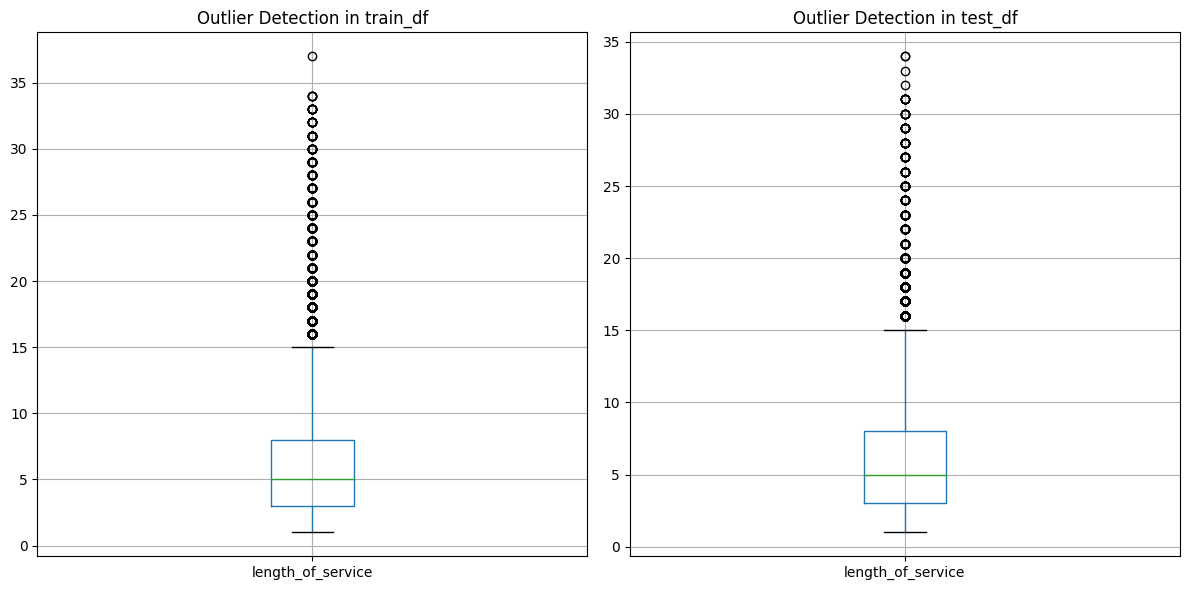

In [14]:
#Checking for Outliers
# Plot box plots to visualize outliers in the datasets
dataframes = [('train_df', train), ('test_df', test)]

# Plot side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for ax, (name, df) in zip(axes, dataframes):
    df[['length_of_service']].boxplot(ax=ax)
    ax.set_title(f'Outlier Detection in {name}')

plt.tight_layout()
plt.show()

## Region Columnn - Cleaning and Grouping

In [15]:
#Checking the count of unique values in the region column
train.region.value_counts()

region
region_2     10811
region_22     5435
region_7      4397
region_15     2512
region_13     2463
region_26     1966
region_31     1692
region_4      1626
region_27     1418
region_16     1319
region_11     1189
region_28     1143
region_23     1104
region_29      896
region_19      838
region_20      780
region_32      773
region_14      770
region_17      742
region_25      721
region_5       690
region_10      614
region_30      602
region_6       579
region_8       578
region_1       553
region_24      462
region_12      425
region_21      370
region_3       331
region_9       324
region_33      260
region_34      253
region_18       24
Name: count, dtype: int64

The original `region` column contains many unique values, which could add unnecessary complexity to the model. Grouping less common regions as "Other" helps simplify this feature, making it more interpretable and reducing noise. This can allow the model to identify promotion trends related to major regions without overfitting to sparse regions.

In [16]:
# Defining the threshold for grouping into "Other"
threshold = 1000

# Identifying regions that meet the threshold criteria
common_regions = train['region'].value_counts()
common_regions = common_regions[common_regions >= threshold].index

# Using np.where to assign regions based on the threshold
train['region_cleaned'] = np.where(train['region'].isin(common_regions), train['region'], 'Other')

In [17]:
#Checking the number of unique values in the cleaned region column
train.region_cleaned.nunique()

14

## Department Column - Cleaning and Grouping

In [18]:
train.department.value_counts()

department
Sales & Marketing    14239
Operations           10547
Procurement           6641
Technology            6502
Analytics             4610
Finance               2219
HR                    2142
R&D                    893
Legal                  867
Name: count, dtype: int64

In [19]:
train['department'] = train['department'].replace({'Finance': 'Other', 'HR': 'Other', 'R&D': 'Other', 'Legal': 'Other'})

Grouping smaller departments into an "Other" category balances categorical variables, making the model more robust and easier for stakeholders to interpret. This approach simplifies the dataset, improving both analysis and model performance.

# Exploratory Data Analysis

## Univariate Analysis

**Distribution of Categorical Features**

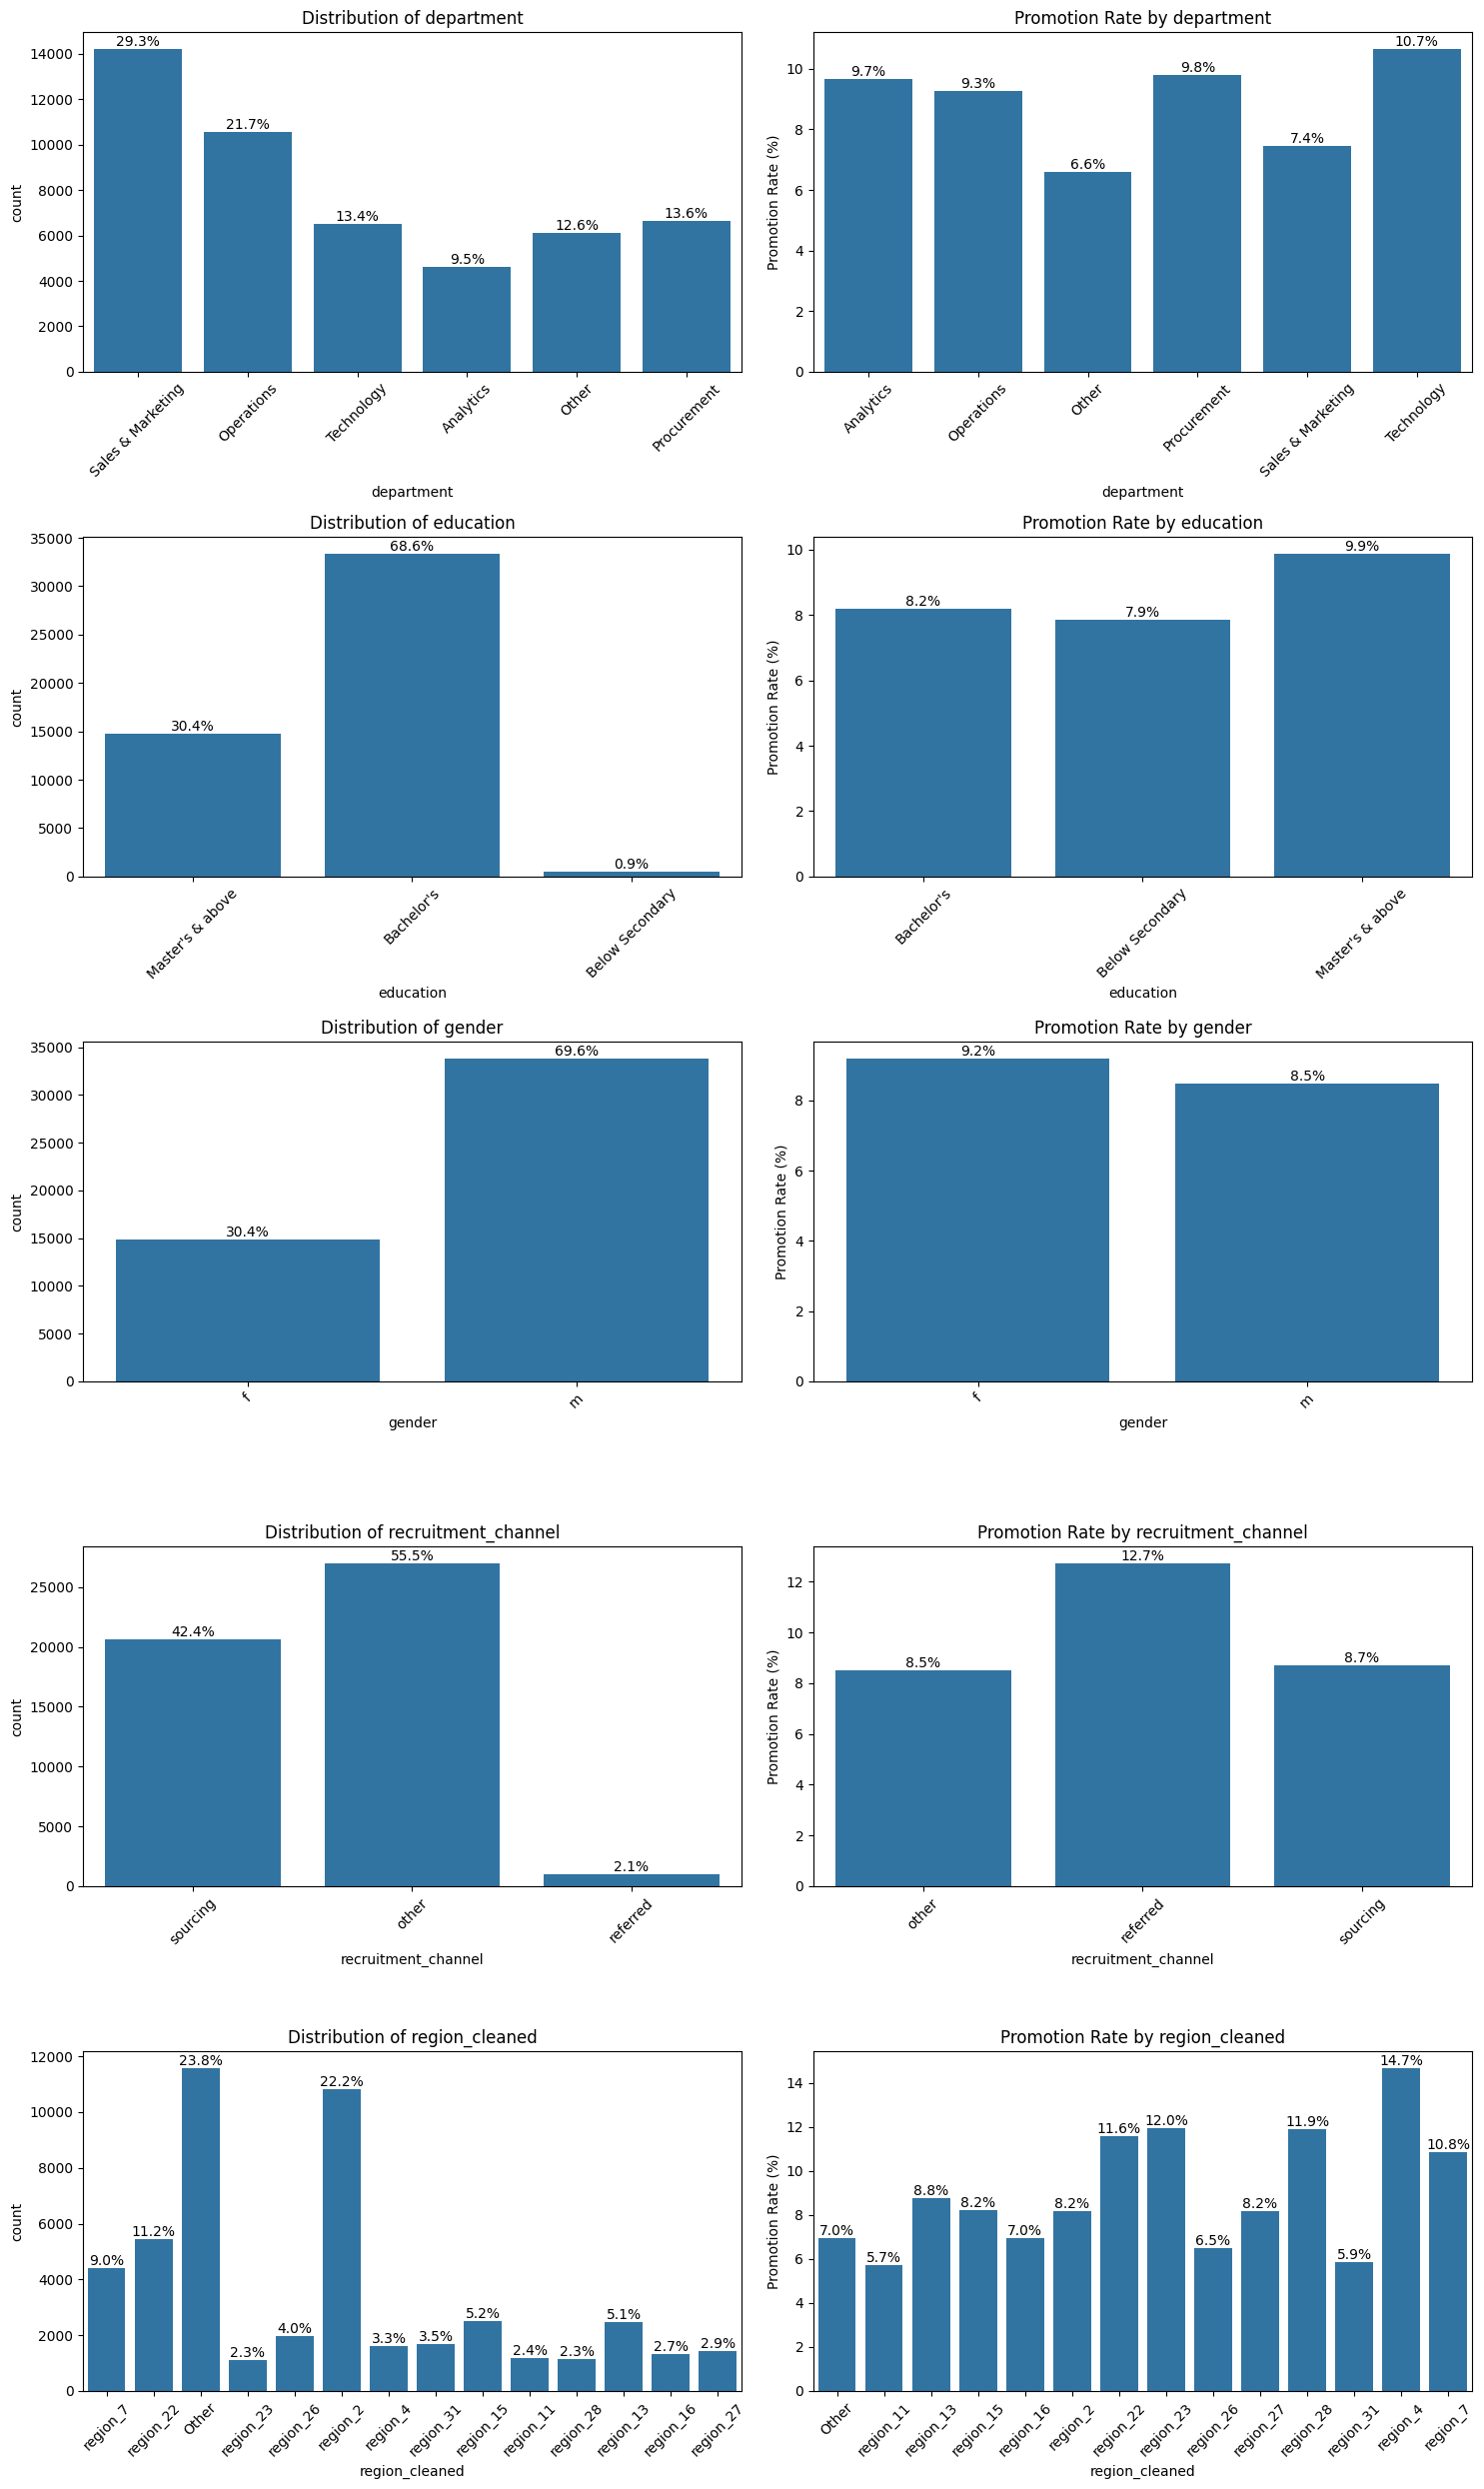

In [20]:
def plot_categorical_distributions(train, columns, target='is_promoted'):
    plt.figure(figsize=(15, len(columns) * 5))
    
    for idx, col in enumerate(columns, 1):
        # Plot distribution of the categorical feature
        plt.subplot(len(columns), 2, 2 * idx - 1)
        ax1 = sns.countplot(data=train, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        
        # Add percentages on top of bars
        total = len(train)
        for p in ax1.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax1.annotate(percentage, (x, y), ha='center', va='bottom')

        # Plot promotion rate by category
        plt.subplot(len(columns), 2, 2 * idx)
        promotion_rate = train.groupby(col)[target].mean() * 100
        ax2 = sns.barplot(x=promotion_rate.index, y=promotion_rate.values)
        plt.title(f'Promotion Rate by {col}')
        plt.ylabel('Promotion Rate (%)')
        plt.xticks(rotation=45)
        
        # Add percentages on top of bars for promotion rate
        for p in ax2.patches:
            percentage = f'{p.get_height():.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax2.annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Define categorical columns
categorical_cols = ['department', 'education', 'gender', 'recruitment_channel', 
                   'region_cleaned']

# Call the function
plot_categorical_distributions(train, categorical_cols)

**Insights**

**Distribution of Department**

The department distribution shows that Sales & Marketing is the largest department, comprising 29.3% of the workforce, followed by Operations at 21.7% and Technology at 13.4%. Promotion rates are highest in Technology (10.7%), with Procurement, Analytics, and Operations also showing strong promotion rates. In contrast, HR and Legal have lower promotion rates, suggesting areas for potential improvement.

**Distribution of Education**

In terms of education, 68.6% of employees hold a Bachelor’s degree, while 30.4% have a Master’s degree or higher. Promotion rates increase with educational level, as employees with advanced degrees have a promotion rate of 9.9%, compared to 8.2% for Bachelor’s degree holders.

**Gender Distribution**

The gender distribution shows a predominantly male workforce at 69.6%, with females comprising 30.4%. However, females have a slightly higher promotion rate at 9.2% compared to males, suggesting equitable advancement opportunities.

**Recruitment Channel Distribution**

Recruitment channels are primarily led by “Other” methods (55.5%), followed by sourcing (42.4%), with referrals at 2.1%. Referred employees have the highest promotion rate at 12.7%, highlighting the effectiveness of referrals in bringing high-potential talent.

**Region Distribution and Promotion Rate**

In the regional distribution, the “Other” category and region_22 have the highest employee counts, while region_4 leads in promotion rate at 14.7%. Other regions show varied advancement rates, indicating regional differences in promotion opportunities.


**Distribution of numeric columns and Promotion Status**

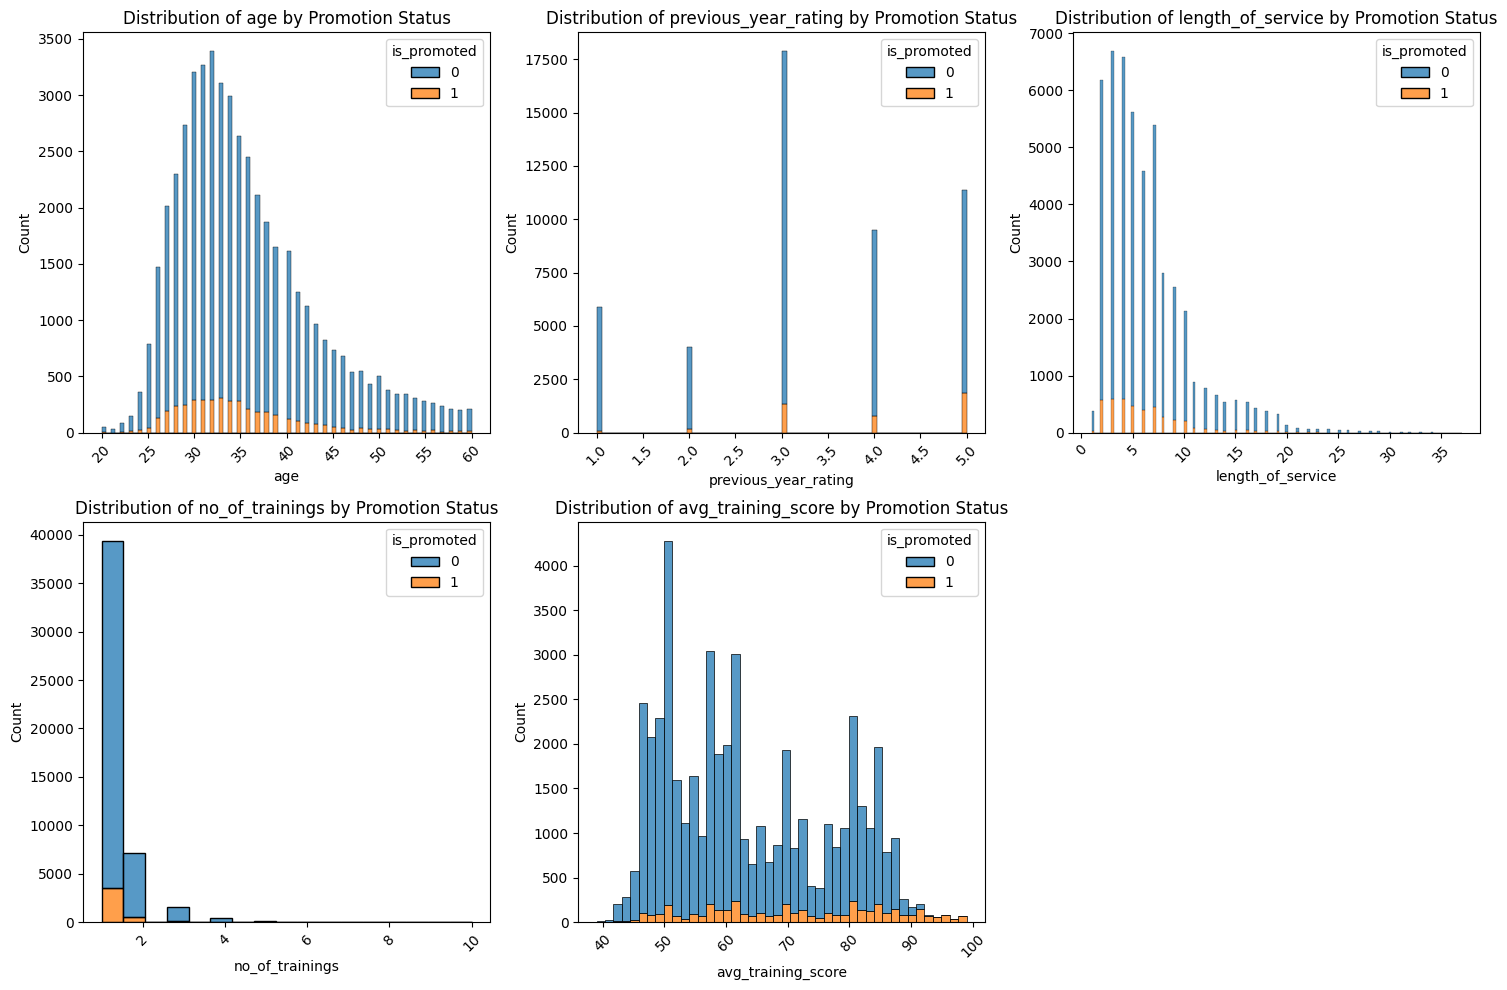

In [21]:
numerical_cols = ['age', 'previous_year_rating', 'length_of_service', 
                 'no_of_trainings', 'avg_training_score']

plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(data=train, x=col, hue='is_promoted', multiple="stack")
    plt.title(f'Distribution of {col} by Promotion Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. **Age Distribution by Promotion Status**  
   Most employees are between 25 and 40, with a peak in the 30-35 range. Promotion rates are highest among employees aged 30-40, with fewer promotions for younger (<30) and older (>40) employees. The data may suggest a preference for promoting employees in their 30s, warranting a review to ensure age inclusivity in promotion practices.

2. **Previous Year Rating Distribution by Promotion Status**  
   Employee ratings are mostly concentrated around 3, with fewer at 1, 2, 4, and 5. Higher ratings (3, 4, and 5) correlate with more promotions, while lower ratings (1 and 2) see fewer promotions. This highlights the importance of performance ratings in promotion decisions and suggests that employees with lower ratings may benefit from support and training to boost promotion chances.

3. **Length of Service Distribution by Promotion Status**  
   Most employees have 0-10 years of service, with a drop-off for those over 10 years. Employees with 2-10 years see more promotions, while both new hires (<2 years) and long-term employees (>10 years) have fewer promotions. This suggests a mid-career advantage, with a need to create growth opportunities for long-term employees to encourage retention.

4. **Number of Trainings Distribution by Promotion Status**  
   Most employees have attended 1-2 trainings, and promotions are more common among those with 1-3 trainings. Those with over 3 trainings see fewer promotions, indicating that a moderate amount of training is linked to higher promotion rates. This suggests a need to assess the relevance of training for employees with multiple trainings to ensure it aligns with promotion goals.

5. **Average Training Score Distribution by Promotion Status**  
   Training scores are spread widely, with common scores around 50, 60, 70, and 80. Promotions are more frequent among those scoring 60-80, indicating that high performance in training correlates with promotion likelihood. High-quality, impactful training programs can help improve employee performance and advancement potential.

### Bivariate Analysis

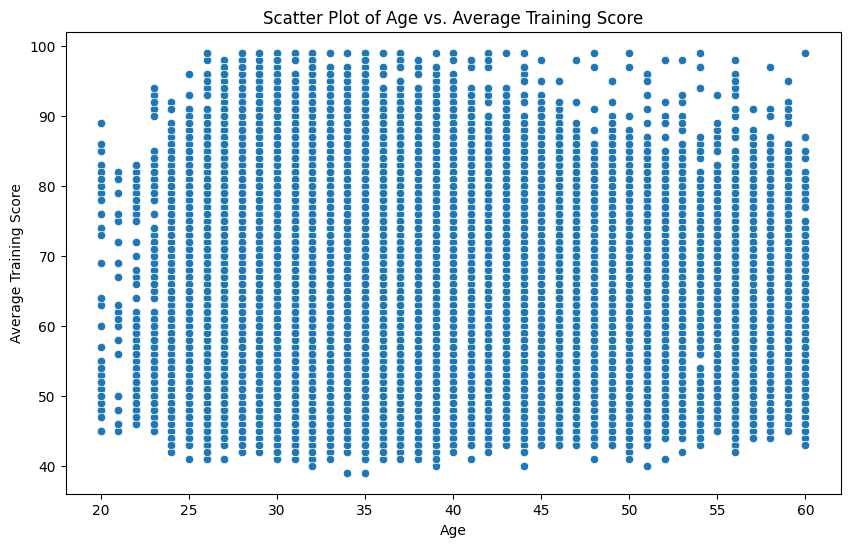

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='age', y='avg_training_score')
plt.title('Scatter Plot of Age vs. Average Training Score')
plt.xlabel('Age')
plt.ylabel('Average Training Score')
plt.show()



The scatter plot of Age vs. Average Training Score shows that the training scores are spread across all age groups, with scores ranging mainly from 40 to 100. There’s a concentration of scores between 60 and 90 across most ages, indicating that training scores are relatively consistent across different age groups. There doesn’t seem to be a strong correlation between age and training score, as scores appear distributed without a clear trend or pattern linked to age.

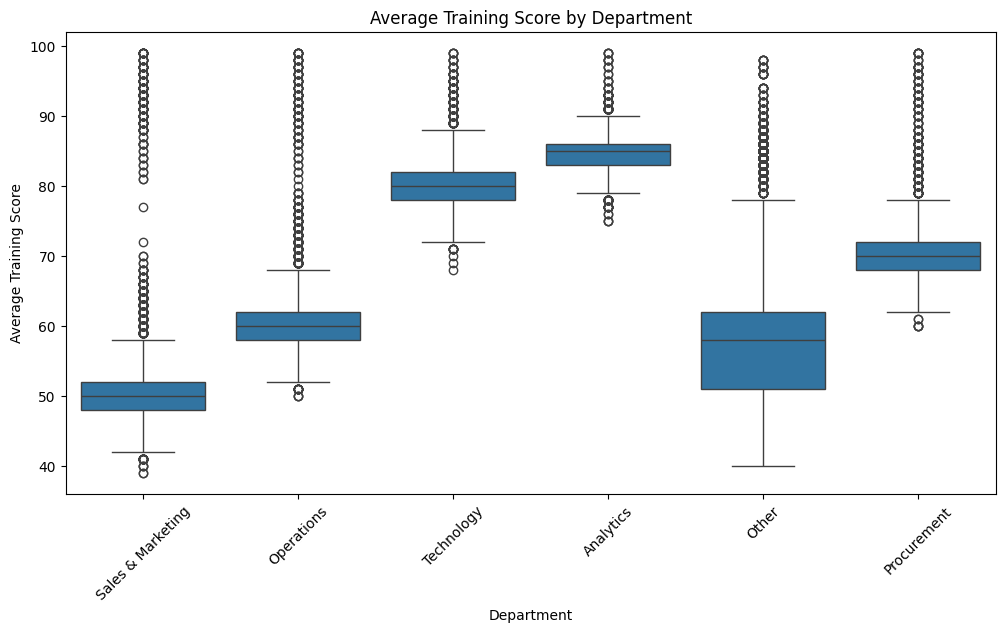

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='department', y='avg_training_score')
plt.title('Average Training Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Training Score')
plt.xticks(rotation=45)
plt.show()



The box plot of Average Training Score by Department shows distinct variations in training scores across departments. The Technology and Analytics departments have higher median training scores, generally between 80 and 90, while HR and Operations have lower medians around 60. Outliers are prevalent in all departments, indicating variability in scores within each category. Departments with higher average training scores, like Technology, might have more emphasis on training performance, while others, such as HR, show a wider range, possibly suggesting diverse training outcomes.

### Multivariate Analysis

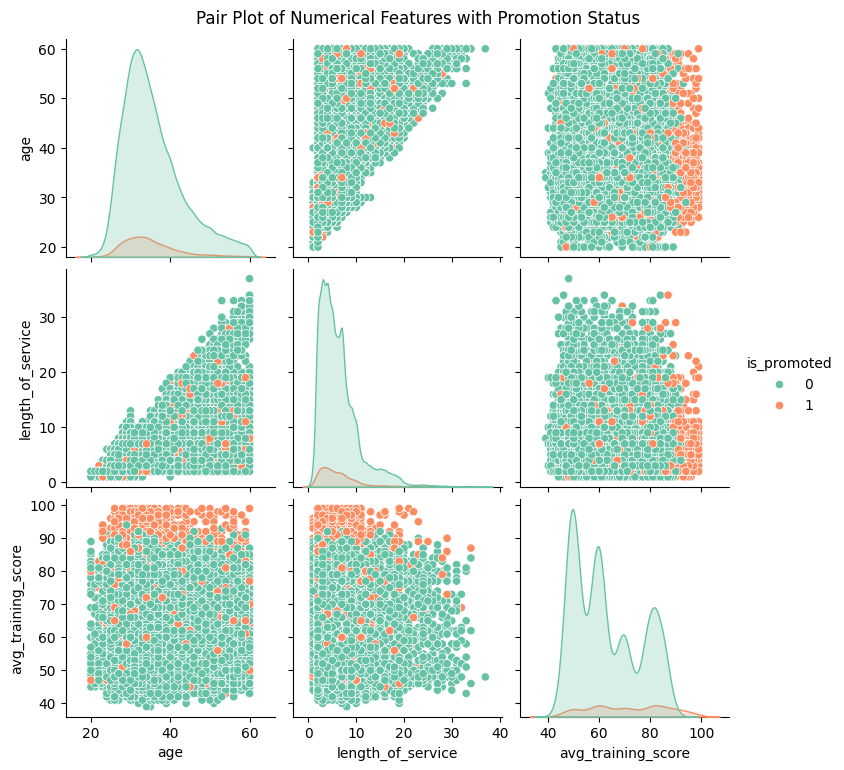

In [24]:
# Selecting relevant numerical columns and including 'is_promoted' as hue
sns.pairplot(train, vars=['age', 'length_of_service', 'avg_training_score'], hue='is_promoted', palette='Set2')
plt.suptitle('Pair Plot of Numerical Features with Promotion Status', y=1.02)
plt.show()



The pair plot reveals several insights regarding promotion status across age, length of service, and average training score. There’s a strong positive correlation between age and length of service, as expected, with longer-serving employees generally being older. Average training score shows no significant correlation with either age or length of service, indicating that training scores are independent of an employee's age or tenure.

Regarding promotion, promoted employees (orange points) appear distributed similarly across the age and length of service ranges but are more concentrated in higher average training scores. This suggests that a higher training score might be an indicator of promotion potential, while age and tenure show less of an impact on promotion likelihood.

# Recommendations

Departmental Focus:

The Technology department, with the highest promotion rate, might be leveraging effective talent development and career progression programs. Other departments could benefit from analyzing these strategies.

HR and Legal departments could review their promotion criteria and employee development programs to enhance career advancement opportunities.

Educational Attainment:

Higher educational qualifications correlate with higher promotion rates, suggesting that advanced degrees might offer better career advancement opportunities.

Companies could incentivize further education or provide educational support to employees to enhance their career growth.

Data Imbalance:

The data shows some imbalance with significantly more employees in Bachelors degree categories. This should be considered in model training to
Targeted HR Strategies:

Region-Specific Initiatives: Develop targeted initiatives for regions with low promotion rates. This could include mentorship programs, training, and clear career progression pathways.

Age-Inclusive Policies: Implement policies that ensure fair opportunities for all age groups, including tailored training and professional development programs for older employees.

Performance Monitoring:

Regularly track promotion rates across regions and age groups to identify and address any disparities.

Use these insights to inform HR policies and ensure equitable promotion practices.

Employee Feedback:

Collect feedback from employees in regions and age groups with lower promotion rates to understand their challenges and improve HR practices. avoid biases.

# Feature Engineering

Feature Engineering involves creating, modifying, or selecting features that best represent the underlying patterns in the data relevant to the task at hand. Feature engineering can significantly boost the performance of machine learning models by making features more predictive and relevant, helping models to understand the data's patterns more effectively.

Feature engineering techniques:
- Removing unnecessary columns
- Extracting features from date and time features
- Extracting features from categorical features
- Binning numerical and categorical features
- Aggregating multiple features together by using simple arithmetic operationstions

## Age Column - Creating Age Group Feature

In [25]:
# Checking the count of unique values in the age column
train.age.value_counts()

age
32    3389
31    3268
30    3202
33    3106
34    2989
29    2731
35    2637
36    2451
28    2301
37    2117
27    2015
38    1875
39    1647
40    1616
26    1472
41    1254
42    1127
43     962
44     824
25     784
45     739
46     684
48     548
47     539
50     507
49     434
51     378
24     362
53     345
52     343
54     305
55     284
56     263
57     235
60     210
58     207
59     202
23     144
22      84
20      51
21      29
Name: count, dtype: int64

The `age` column has many unique values, which can make the model overly complex. By binning ages into broader groups, we reduce dimensionality and enable the model to capture general patterns related to employee age and promotion likelihood. This may help identify trends where certain age groups have a higher promotion rate.

In [26]:
# Create age group feature
train['age_group'] = pd.cut(train['age'], bins=[-1, 20, 30, 40, 50, 60, 70], 
                              labels=['Under 20', '20-30', '30-40', '40-50', '50-60', 'Over 60'])

## Length of Service Column - Creating Service Group Feature

In [27]:
#Checking the count of unique values in the length of service column
train.length_of_service.value_counts()

length_of_service
3     6680
4     6585
2     6185
5     5622
7     5385
6     4582
8     2804
9     2555
10    2140
11     892
12     776
13     660
15     580
16     539
14     536
17     426
18     384
1      380
19     319
20     128
21      74
24      67
23      62
22      60
25      49
26      41
27      36
29      30
28      29
31      19
30      12
33       9
32       9
34       4
37       1
Name: count, dtype: int64

`length_of_service` also has a high number of unique values, which could complicate the model. By grouping values into categories, we capture general tenure patterns that might influence promotion decisions. For instance, employees with longer service might have a higher promotion likelihood due to experience and loyalty.

In [28]:
# Create service group feature
train['service_group'] = pd.cut(
    train['length_of_service'], bins=[-1, 2, 5, 10, 50],
    labels=['Less than 2 years', '2-5 years', '5-10 years', 'Over 10 years']
)

## Average Training Score - Creating Score Group Feature

The `avg_training_score` reflects training outcomes, but its many unique values make it less interpretable. By binning scores into performance levels (Low, Medium, High, Very High), the model can identify high-performing employees who might be more likely to receive a promotion.

In [29]:
# Creating the score_group feature
train['score_group'] = pd.cut(
    train['avg_training_score'], bins=[-0.1, 50, 60, 75, 100], labels=['Low', 'Medium', 'High', 'Very High'])

The binning of avg_training_score is based on the score distribution and quartile values, creating categories that are easy to interpret and meaningful. These bins—Low (≤50), Medium (51-60), High (61-75), and Very High (>75)—align with performance levels, helping to identify employees’ training outcomes as underperforming, average, above-average, or top performers. This approach improves interpretability, reduces model complexity, and maintains consistency across data points.

## Performance Index Feature
The `performance_index` combines multiple indicators of employee performance, such as `previous_year_rating`, `KPIs_met >80%`, and `awards_won?`. This composite feature provides a comprehensive view of an employee's performance, helping the model to prioritize higher-performing employees for promotion.
python

In [30]:
# Creating the Performance Index Feature
train['performance_index'] = ((train['previous_year_rating']/5) * 0.4 + train['KPIs_met >80%'] * 0.3 +train['awards_won?'] * 0.3)

## Career Velocity Feature
`career_velocity` captures the relationship between an employee’s `previous_year_rating` and `length_of_service`, indicating how quickly they have advanced. Higher `career_velocity` values may signify an employee who is excelling faster than peers with similar tenure, making them more likely candidates for promotion.

In [31]:
train['career_velocity'] = train['previous_year_rating'] / (train['length_of_service'] + 1)

## Relative Experience Feature
The `relative_experience` feature compares an employee's `age` to their `length_of_service`, providing insight into their experience relative to their career stage. Employees with high relative experience may bring valuable insights and skills that can influence promotion potential.

In [32]:
train['relative_experience'] = train['age'] / (train['length_of_service'] + 1)

## Training Frequency Feature
This feature captures the frequency of training sessions relative to `length_of_service`, reflecting an employee’s commitment to continuous learning. Higher training frequency may indicate an employee's dedication to development, positively impacting promotion decisions.

In [33]:
train['training_frequency'] = train['no_of_trainings'] / (train['length_of_service'] + 1)

## Training Effectiveness Feature
`training_effectiveness` measures how well an employee applies training based on their scores and the number of training sessions taken. High effectiveness scores suggest that an employee is retaining and utilizing training, making them strong promotion candidates.

In [34]:
train['training_effectiveness'] = train['avg_training_score'] / (train['no_of_trainings'] + 1)

## Relative Performance Feature
`relative_performance` standardizes each employee’s performance within their department, allowing the model to identify top performers relative to their peers. High relative performance indicates an employee who stands out within their department, signaling potential for promotion.

In [35]:
train['relative_performance'] = train.groupby('department')['previous_year_rating'].transform(
        lambda x: (x - x.mean()) / x.std()
    )

## Consistent Performer Feature
This feature identifies employees with consistent high ratings and KPI achievement. These employees demonstrate reliability, making them strong candidates for promotion, as they are consistently meeting or exceeding performance standards.

In [36]:
train['consistent_performer'] = ((train['previous_year_rating'] >= 4) & (train['KPIs_met >80%'] == 1)).astype(int)

## Dropping Redundant Columns
To avoid multicollinearity and simplify the model, unnecessary columns like `employee_id`, `region`, `gender`, `age`, `length_of_service`, and `avg_training_score` are dropped. This reduces model complexity by removing features that have been transformed or are not directly relevant to promotion predictions.

In [37]:
train = train.drop(columns=['employee_id', 'region','region_cleaned','gender','age','length_of_service','avg_training_score',])

In [38]:
train.dtypes

department                  object
education                   object
recruitment_channel         object
no_of_trainings              int64
previous_year_rating       float64
KPIs_met >80%                int64
awards_won?                  int64
is_promoted                  int64
age_group                 category
service_group             category
score_group               category
performance_index          float64
career_velocity            float64
relative_experience        float64
training_frequency         float64
training_effectiveness     float64
relative_performance       float64
consistent_performer         int32
dtype: object

## Statistical Test for feature relevance 

In [39]:
## T-Test for Numeric Features

In [40]:
numerical_features = ['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 
                      'awards_won?', 'performance_index', 'career_velocity', 
                      'relative_experience', 'training_frequency', 
                      'training_effectiveness', 'relative_performance', 'consistent_performer']

# Store features with significant p-values
significant_numerical_features = []

# T-test for numerical features
for feature in numerical_features:
    promoted = train[train['is_promoted'] == 1][feature]
    not_promoted = train[train['is_promoted'] == 0][feature]
    t_stat, p = ttest_ind(promoted, not_promoted, nan_policy='omit')
    if p <= 0.05:
        significant_numerical_features.append(feature)
    else:
        print(f"Dropping {feature} - T-test p-value: {p}")

# Drop insignificant numerical features from the DataFrame
train = train.drop(columns=[feature for feature in numerical_features if feature not in significant_numerical_features])
print("Significant Numerical Features:", significant_numerical_features)

Dropping relative_experience - T-test p-value: 0.3927354022293703
Significant Numerical Features: ['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'performance_index', 'career_velocity', 'training_frequency', 'training_effectiveness', 'relative_performance', 'consistent_performer']


## Chi-square test for categorical features

In [41]:
# List of categorical features
categorical_features = ['department', 'education', 'recruitment_channel', 
                    'age_group', 'service_group', 'score_group']

# Store features with significant p-values
significant_categorical_features = []

# Chi-Square Test
for feature in categorical_features:
    contingency_table = pd.crosstab(train[feature], train['is_promoted'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p <= 0.05:
        significant_categorical_features.append(feature)
    else:
        print(f"Dropping {feature} - Chi-Square Test p-value: {p}")

# Drop insignificant categorical features from the DataFrame
train = train.drop(columns=[feature for feature in categorical_features if feature not in significant_categorical_features])
print("Significant Categorical Features:", significant_categorical_features)

Significant Categorical Features: ['department', 'education', 'recruitment_channel', 'age_group', 'service_group', 'score_group']


In [42]:
# Combine significant categorical and numerical features
significant_features = significant_categorical_features + significant_numerical_features 

# Add 'is_promoted' to the list of significant features
significant_features.append('is_promoted')

# Create a DataFrame with all significant features
train = train[significant_features]

# Display the DataFrame with all significant features
train.dtypes

department                  object
education                   object
recruitment_channel         object
age_group                 category
service_group             category
score_group               category
no_of_trainings              int64
previous_year_rating       float64
KPIs_met >80%                int64
awards_won?                  int64
performance_index          float64
career_velocity            float64
training_frequency         float64
training_effectiveness     float64
relative_performance       float64
consistent_performer         int32
is_promoted                  int64
dtype: object

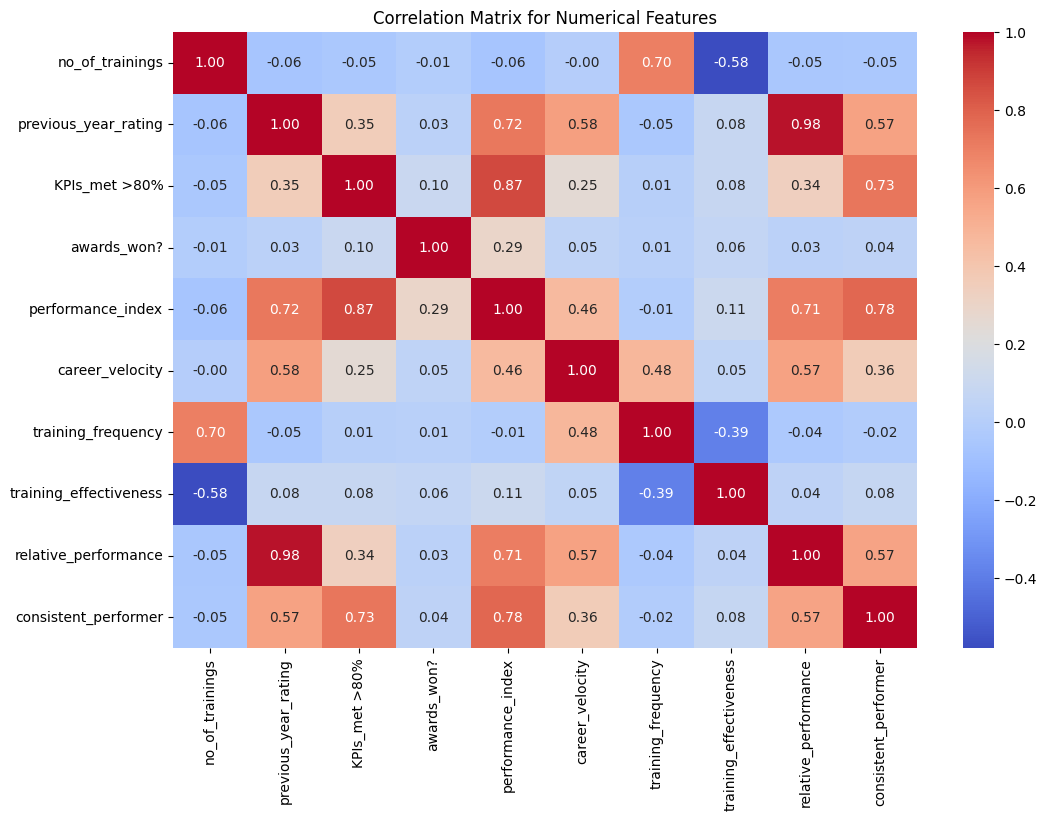

In [43]:
# Select only numerical features
numerical_features = ['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 
                      'awards_won?', 'performance_index', 'career_velocity', 
                      'training_frequency', 'training_effectiveness', 'relative_performance', 
                      'consistent_performer']

# Calculate correlation matrix for numerical features
correlation_matrix = train[numerical_features].corr()

# Plot heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

The correlation matrix reveals several instances of high correlation between features, indicating potential multicollinearity in the dataset. 

**Key Observations:**
- **`previous_year_rating` and `relative_performance`**: These features have a very high correlation (≈ 0.98), suggesting that they capture nearly identical information. Retaining both could introduce redundancy, so one of these features can be removed to simplify the model.
- **`KPIs_met >80%` and `performance_index`**: With a correlation of around 0.87, these two features are also highly correlated.
- **`performance_index` and `consistent_performer`**: There is a moderate correlation (≈ 0.78) between these features, which may indicate some overlap in the information they provide.

**Next Steps:**

To address multicollinearity, we will remove one feature from each highly correlated pair, prioritizing features that are more interpretable or directly relevant to the prediction task. 
This approach will help us build a more robust model by focusing on features that provide unique, non-redundant information.

In [44]:
# Define the features to drop based on correlation analysis
features_to_drop = ['no_of_trainings', 'previous_year_rating', 'performance_index']  # Add 'consistent_performer' if necessary

# Drop the selected features from the DataFrame
train = train.drop(columns=features_to_drop)

# Display the remaining columns to confirm
print("Remaining features after dropping highly correlated features:")
print(train.columns)

Remaining features after dropping highly correlated features:
Index(['department', 'education', 'recruitment_channel', 'age_group',
       'service_group', 'score_group', 'KPIs_met >80%', 'awards_won?',
       'career_velocity', 'training_frequency', 'training_effectiveness',
       'relative_performance', 'consistent_performer', 'is_promoted'],
      dtype='object')


### Calculating Variance Inflation Factor to Ensure Multicollinearity is reduced

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Update the DataFrame with the remaining features after dropping selected ones
selected_features = ['KPIs_met >80%', 
                      'awards_won?','career_velocity', 
                      'training_frequency', 'training_effectiveness','relative_performance',
                      'consistent_performer']  # Adjust based on the chosen drops

# Calculate VIF for each remaining feature
X = train[selected_features]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

                  Feature       VIF
0           KPIs_met >80%  3.458024
1             awards_won?  1.037453
2         career_velocity  9.303395
3      training_frequency  4.435639
4  training_effectiveness  4.349026
5    relative_performance  2.389475
6    consistent_performer  3.729234


With the current set of features, all VIF values are within or close to the acceptable range (VIF < 10). We can proceed with these features in the model without concerns of multicollinearity. 

In [46]:
train.dtypes

department                  object
education                   object
recruitment_channel         object
age_group                 category
service_group             category
score_group               category
KPIs_met >80%                int64
awards_won?                  int64
career_velocity            float64
training_frequency         float64
training_effectiveness     float64
relative_performance       float64
consistent_performer         int32
is_promoted                  int64
dtype: object

# Data Preprocessing

## Encoding categoring variables

In [47]:
# Define the lists of nominal and ordinal features
nominal_features = ['department', 'recruitment_channel']
ordinal_features = ['age_group', 'service_group', 'score_group', 'education']

# Frequency Encoding for Nominal Features
for feature in nominal_features:
    freq_encoding = train[feature].value_counts(normalize=True)
    train[f'{feature}_freq_encoded'] = train[feature].map(freq_encoding)

# Drop the original nominal columns
train = train.drop(columns=nominal_features)

# Define specific orders for each ordinal feature
age_order = ['Under 20', '20-30', '30-40', '40-50', '50-60', 'Over 60']
service_order = ['Less than 2 years', '2-5 years', '5-10 years', 'Over 10 years']
score_order = ['Low', 'Medium', 'High', 'Very High']
education_order = ['Below Secondary', "Bachelor's", "Master's & above"]

# Convert each ordinal feature to a categorical type with a specified order, then apply Label Encoding
train['age_group'] = pd.Categorical(train['age_group'], categories=age_order, ordered=True)
train['service_group'] = pd.Categorical(train['service_group'], categories=service_order, ordered=True)
train['score_group'] = pd.Categorical(train['score_group'], categories=score_order, ordered=True)
train['education'] = pd.Categorical(train['education'], categories=education_order, ordered=True)

# Label Encoding for Ordinal Features
le = LabelEncoder()
for feature in ordinal_features:
    train[feature] = le.fit_transform(train[feature])

# Check the DataFrame to confirm both encodings
train.head()

,education,age_group,service_group,score_group,KPIs_met >80%,awards_won?,career_velocity,training_frequency,training_effectiveness,relative_performance,consistent_performer,is_promoted,department_freq_encoded,recruitment_channel_freq_encoded
0,2,1,1,1,1,0,0.555556,0.111111,24.500000,1.400532,1,0,0.292622,0.423818
1,0,0,0,2,0,0,1.000000,0.200000,30.000000,1.176856,0,0,0.216749,0.555220
2,0,1,1,1,0,0,0.375000,0.125000,25.000000,-0.055899,0,0,0.292622,0.423818
3,0,1,1,1,0,0,0.090909,0.181818,16.666667,-1.512329,0,0,0.292622,0.555220
4,0,2,2,0,0,0,1.000000,0.333333,36.500000,-0.137837,0,0,0.133621,0.555220


# Splitting the data

In [48]:
# Split the predictor and target variables
X = train.drop('is_promoted', axis=1) #predictor
y = train['is_promoted'] #target 

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [49]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:\n", feature_importance_df)

# Optional: Select features above a certain importance threshold
importance_threshold = 0.01  # Adjust this threshold based on your requirements
selected_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature'].tolist()

# Create a new dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("Selected Features:\n", selected_features)

Feature Importances:
                              Feature  Importance
8             training_effectiveness    0.362060
11           department_freq_encoded    0.110322
9               relative_performance    0.083053
6                    career_velocity    0.080307
7                 training_frequency    0.077755
12  recruitment_channel_freq_encoded    0.053609
1                          age_group    0.051226
3                        score_group    0.044294
4                      KPIs_met >80%    0.042567
5                        awards_won?    0.034361
0                          education    0.031446
2                      service_group    0.017194
10              consistent_performer    0.011807
Selected Features:
 ['training_effectiveness', 'department_freq_encoded', 'relative_performance', 'career_velocity', 'training_frequency', 'recruitment_channel_freq_encoded', 'age_group', 'score_group', 'KPIs_met >80%', 'awards_won?', 'education', 'service_group', 'consistent_performer']


# Balancing the Target Variable

In [50]:
!pip install -U imbalanced-learn

In [51]:
# Use SMOTE to handle class imbalance
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Preview original and synthetic sample class distribution
print('Original class distribution: \n', y.value_counts())
print('-----------------------------------------')
print('Synthetic sample class distribution: \n', pd.Series(y_train_resampled).value_counts())

Original class distribution: 
 is_promoted
0    44428
1     4232
Name: count, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 
 is_promoted
0    33350
1    33350
Name: count, dtype: int64


# Scaling the data

In [52]:
# Scaling features (necessary for models like Logistic Regression, SVM, etc.)

scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_selected)

# Convert into a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_selected.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_selected.columns)

# Modelling

The **F1 score** is the chosen evaluation metric of success, as it emphasizes a balanced approach between identifying actual promotions (recall) and minimizing incorrect promotion predictions (precision). 

This project pushes towards an **F1-Score of 0.80** as this would reflect a model that is both specific and sensitive.

In [53]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, classification_report,
                             recall_score, f1_score, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [54]:
import xgboost
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Modified function to return results as a dictionary
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Instantiate models
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Evaluate each model and collect results
results = []
for model in [log_reg_model, dt_model, rf_model, gb_model, xgb_model, svm_model]:
    result = evaluate_model(model, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
    results.append(result)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,LogisticRegression,0.719852,0.210237,0.774609,0.330715,"[[7915, 3163], [245, 842]]"
1,DecisionTreeClassifier,0.896589,0.417867,0.400184,0.408835,"[[10472, 606], [652, 435]]"
2,RandomForestClassifier,0.910481,0.498747,0.366145,0.422281,"[[10678, 400], [689, 398]]"
3,GradientBoostingClassifier,0.897986,0.427903,0.420423,0.424130,"[[10467, 611], [630, 457]]"
4,XGBClassifier,0.926757,0.665541,0.362466,0.469327,"[[10880, 198], [693, 394]]"
5,SVC,0.762762,0.240254,0.765409,0.365714,"[[8447, 2631], [255, 832]]"


## Hyperparameter Tuning

### Finding the best Parameters

**GridSearchCV for XGBClassifier**

In [55]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from collections import Counter

# Calculate scale_pos_weight based on class imbalance
class_counts = Counter(y_train_resampled)
scale_pos_weight = class_counts[0] / class_counts[1]  # Assuming 0 is the majority and 1 is the minority class

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, scale_pos_weight]  # Adjust for class imbalance
}

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform grid search
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train_resampled)

# Get the best parameters and best F1 score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best F1 Score for XGBoost:", grid_search_xgb.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': 1}
Best F1 Score for XGBoost: 0.9456603758141581


**RandomizedSearchCV for RandomForestClassifier**

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform randomized search
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, scoring='f1', cv=3, verbose=1, n_jobs=-1, n_iter=20, random_state=42)
random_search_rf.fit(X_train_scaled, y_train_resampled)

# Get the best parameters and best F1 score
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best F1 Score for Random Forest:", random_search_rf.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 443}
Best F1 Score for Random Forest: 0.9481113137648157


**Best parameters for GradientBoostingClassifier**

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': randint(100, 300),
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Perform randomized search
random_search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist_gb, scoring='f1', cv=3, verbose=1, n_jobs=-1, n_iter=20, random_state=42)
random_search_gb.fit(X_train_scaled, y_train_resampled)

# Get the best parameters and best F1 score
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)
print("Best F1 Score for Gradient Boosting:", random_search_gb.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 192, 'subsample': 1.0}
Best F1 Score for Gradient Boosting: 0.9500951580618087


### Hyperparameter Tuning of the XGB, GradientBoosting and RandomForestClassifier

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define a function to evaluate and store model metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Define models with the best parameters directly
models = {
    'XGB': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, 
                         n_estimators=300, max_depth=7, learning_rate=0.2, scale_pos_weight=1),
    'RandomForest': RandomForestClassifier(random_state=42, n_estimators=300, max_depth=20, 
                                           min_samples_split=5, min_samples_leaf=2, max_features='sqrt'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42, n_estimators=192, max_depth=9, 
                                                   learning_rate=0.1, subsample=1.0)
}

# DataFrame to store the results
results = []

# Loop through each model and evaluate
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train_scaled, y_train_resampled)
    
    # Evaluate the model on the test set
    metrics = evaluate_model(model, X_test_scaled, y_test)
    metrics['Model'] = model_name
    metrics['Best Parameters'] = model.get_params()  # Store parameters used
    
    # Append metrics to results list
    results.append(metrics)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Model,Best Parameters
0,0.922976,0.612613,0.375345,0.465488,"[[10820, 258], [679, 408]]",XGB,"{'objective': 'binary:logistic', 'base_score':..."
1,0.914180,0.527599,0.378105,0.440514,"[[10710, 368], [676, 411]]",RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
2,0.923633,0.626198,0.360626,0.457677,"[[10844, 234], [695, 392]]",GradientBoosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'..."


# Model ensemble

**XGB, GradientBoosting and RandomForestClassifier**

In [59]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd

# Define the base models with best parameters
level_1_estimators = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                          n_estimators=300, max_depth=7, learning_rate=0.2, scale_pos_weight=1)),
    ('gb', GradientBoostingClassifier(random_state=42, n_estimators=192, max_depth=9, 
                                      learning_rate=0.1, subsample=1.0))
]

# Choose Random Forest with best parameters as the final estimator (meta-learner)
final_estimator = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=20, 
                                         min_samples_split=5, min_samples_leaf=2, max_features='sqrt')

# Create the stacking model
stacking_model = StackingClassifier(
    estimators=level_1_estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Fit and evaluate the stacking model
stacking_model.fit(X_train_scaled, y_train_resampled)
stacking_metrics = evaluate_model(stacking_model, X_test_scaled, y_test)

# Display stacking model results
print("Stacking Model Results:", stacking_metrics)

Stacking Model Results: {'Accuracy': 0.9265104808877929, 'Precision': 0.6638370118845501, 'Recall': 0.35970561177552896, 'F1 Score': 0.46658711217183774, 'Confusion Matrix': array([[10880,   198],
       [  696,   391]], dtype=int64)}


**RandomForest,GradientBoosting, XGBClassifier & LogisticRegression**

In [60]:
# Initialize the models with their best parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                    n_estimators=300, max_depth=7, learning_rate=0.2, scale_pos_weight=1)

gb = GradientBoostingClassifier(random_state=42, n_estimators=192, max_depth=9, 
                                learning_rate=0.1, subsample=1.0)

# Fit both models to the training data
xgb.fit(X_train_scaled, y_train_resampled)
gb.fit(X_train_scaled, y_train_resampled)

# Define a function to combine predictions by averaging probabilities
def blended_predict(X_test, threshold=0.4):
    # Get predicted probabilities from each model
    xgb_probs = xgb.predict_proba(X_test)[:, 1]
    gb_probs = gb.predict_proba(X_test)[:, 1]
    
    # Average the probabilities
    avg_probs = (xgb_probs + gb_probs) / 2
    
    # Apply the threshold
    blended_preds = (avg_probs >= threshold).astype(int)
    return blended_preds

# Define evaluation function
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Make blended predictions and evaluate
blended_preds = blended_predict(X_test_scaled, threshold=0.4)
blended_metrics = evaluate_model(y_test, blended_preds)

# Display blended model results
print("Blended Model Results:", blended_metrics)

Blended Model Results: {'Accuracy': 0.915330867242088, 'Precision': 0.5340501792114696, 'Recall': 0.41122355105795766, 'F1 Score': 0.4646569646569647, 'Confusion Matrix': array([[10688,   390],
       [  640,   447]], dtype=int64)}


### Weighted Models

**SVM**

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize SVM with balanced class weights
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train_resampled)

# Make predictions and evaluate
y_pred_svm = svm_model.predict(X_test_scaled)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM F1 Score: {f1_svm}")

SVM F1 Score: 0.36571428571428566


**LGBMClassifier**

In [65]:
from lightgbm import LGBMClassifier

# Initialize LightGBM with imbalance parameter
lgbm_model = LGBMClassifier(is_unbalance=True, random_state=42)
lgbm_model.fit(X_train_scaled, y_train_resampled)

# Make predictions and evaluate
y_pred_lgbm = lgbm_model.predict(X_test_scaled)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
print(f"LightGBM F1 Score: {f1_lgbm}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 33350, number of negative: 33350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1558
[LightGBM] [Info] Number of data points in the train set: 66700, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM F1 Score: 0.4632086851628468


**AdaBoostClassifier**

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize AdaBoost with DecisionTree base estimator
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
ada_model.fit(X_train_scaled, y_train_resampled)

# Make predictions and evaluate
y_pred_ada = ada_model.predict(X_test_scaled)
f1_ada = f1_score(y_test, y_pred_ada)
print(f"AdaBoost F1 Score: {f1_ada}")

AdaBoost F1 Score: 0.3205574912891986


In [67]:
from imblearn.ensemble import BalancedBaggingClassifier

# Initialize BalancedBagging with DecisionTree base estimator
balanced_bagging_model = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
balanced_bagging_model.fit(X_train_scaled, y_train_resampled)

# Make predictions and evaluate
y_pred_balanced_bagging = balanced_bagging_model.predict(X_test_scaled)
f1_balanced_bagging = f1_score(y_test, y_pred_balanced_bagging)
print(f"Balanced Bagging F1 Score: {f1_balanced_bagging}")

Balanced Bagging F1 Score: 0.427263479145473


**XGBClassifier with scale_pos_weight**

In [68]:
from xgboost import XGBClassifier

# Adjust the scale_pos_weight parameter for imbalance handling
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])
xgb_weighted_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
xgb_weighted_model.fit(X_train_scaled, y_train_resampled)

# Make predictions and evaluate
y_pred_xgb_weighted = xgb_weighted_model.predict(X_test_scaled)
f1_xgb_weighted = f1_score(y_test, y_pred_xgb_weighted)
print(f"XGBoost (Weighted) F1 Score: {f1_xgb_weighted}")

XGBoost (Weighted) F1 Score: 0.4693269803454438


**Neural Network**

In [69]:
from sklearn.neural_network import MLPClassifier

# Initialize Multi-layer Perceptron Classifier
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train_resampled)

# Make predictions and evaluate
y_pred_nn = nn_model.predict(X_test_scaled)
f1_nn = f1_score(y_test, y_pred_nn)
print(f"Neural Network F1 Score: {f1_nn}")


Neural Network F1 Score: 0.3964456596035544


### Deployment

In [70]:
import pickle
# Save the model to a file using pickle
with open("xgb_weighted_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


In [74]:
# Load the model
with open("xgb_weighted_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test_selected)

print(predictions)


[1 1 1 ... 1 1 1]
